In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
import matplotlib
from mpl_toolkits import mplot3d
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import os
%matplotlib inline
sns.set(style="ticks")

In [3]:
path=os.environ["userprofile"]+"\\"+".atom"+"\\"+"babies.csv"
print(path)

C:\Users\657432343536\.atom\babies.csv


In [4]:
data = pd.read_csv(path)
print(data)

      case  bwt  gestation  parity   age  height  weight  smoke
0        1  120      284.0       0  27.0    62.0   100.0    0.0
1        2  113      282.0       0  33.0    64.0   135.0    0.0
2        3  128      279.0       0  28.0    64.0   115.0    1.0
3        4  123        NaN       0  36.0    69.0   190.0    0.0
4        5  108      282.0       0  23.0    67.0   125.0    1.0
...    ...  ...        ...     ...   ...     ...     ...    ...
1231  1232  113      275.0       1  27.0    60.0   100.0    0.0
1232  1233  128      265.0       0  24.0    67.0   120.0    0.0
1233  1234  130      291.0       0  30.0    65.0   150.0    1.0
1234  1235  125      281.0       1  21.0    65.0   110.0    0.0
1235  1236  117      297.0       0  38.0    65.0   129.0    0.0

[1236 rows x 8 columns]


In [5]:
data.shape

(1236, 8)

In [6]:
hdata=data

In [7]:
list(zip(hdata.columns, [i for i in hdata.dtypes]))

[('case', dtype('int64')),
 ('bwt', dtype('int64')),
 ('gestation', dtype('float64')),
 ('parity', dtype('int64')),
 ('age', dtype('float64')),
 ('height', dtype('float64')),
 ('weight', dtype('float64')),
 ('smoke', dtype('float64'))]

In [8]:
# Колонки с пропусками
hcols_with_na = [c for c in hdata.columns if hdata[c].isnull().sum() > 0]
hcols_with_na

['gestation', 'age', 'height', 'weight', 'smoke']

In [9]:
data.shape

(1236, 8)

In [10]:
[(c, hdata[c].isnull().sum()) for c in hcols_with_na]

[('gestation', 13), ('age', 2), ('height', 22), ('weight', 36), ('smoke', 10)]

In [11]:
# Доля (процент) пропусков
[(c, hdata[c].isnull().mean()*100) for c in hcols_with_na]

[('gestation', 1.051779935275081),
 ('age', 0.16181229773462785),
 ('height', 1.779935275080906),
 ('weight', 2.912621359223301),
 ('smoke', 0.8090614886731391)]

In [12]:
# Колонки для которых удаляются пропуски
hcols_with_na_temp = ['gestation', 'age', 'height', 'weight','smoke']

In [13]:
# Удаление пропусков
hdata_drop = hdata[hcols_with_na_temp].dropna()
hdata_drop.shape

(1174, 5)

In [14]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

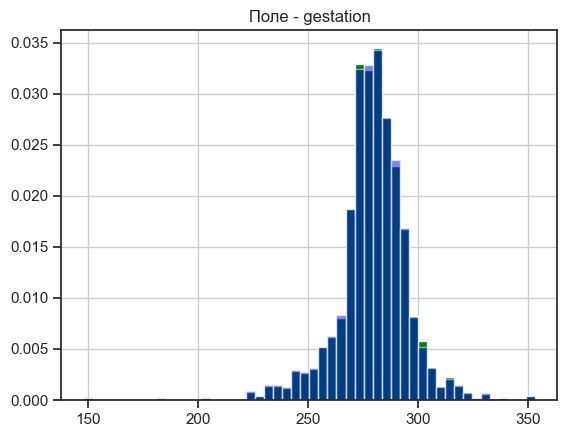

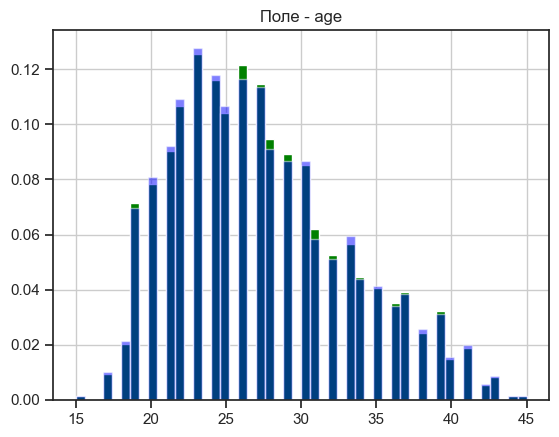

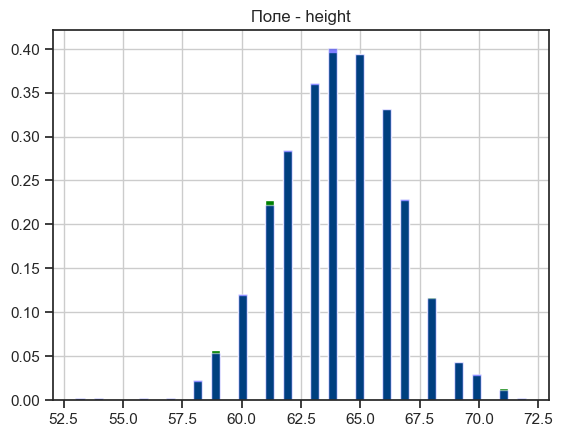

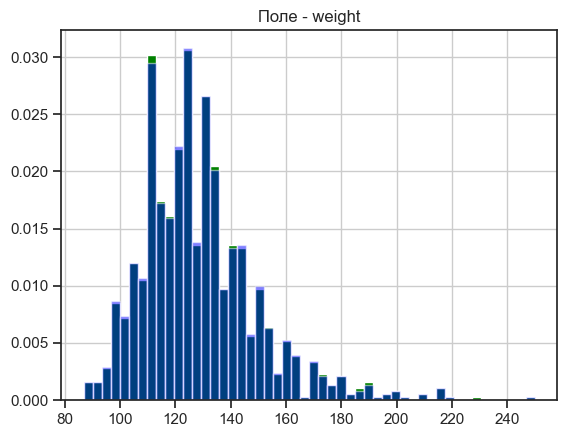

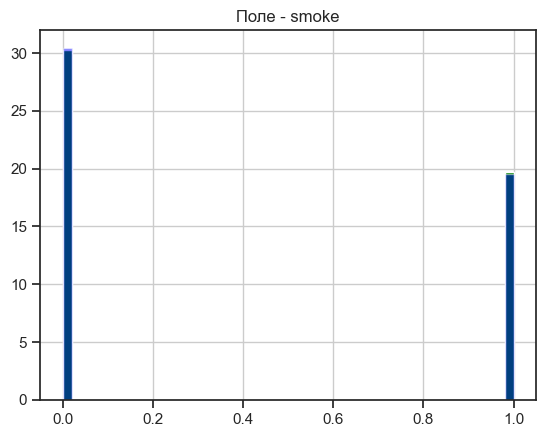

In [15]:
plot_hist_diff(hdata, hdata_drop, hcols_with_na_temp)